In [2]:
# bibliotecas importadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuração no pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

# Configuração no Matplotlib
plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

## Exploração dos Dados

- Perguntas de negocio: Quanto que vale o aluguel da sua casa?

In [10]:
# Lendo os dados
base_dados = pd.read_csv('house_data.csv')

# Dimensão
print(f'Shape:{base_dados.shape}')
base_dados.describe()

Shape:(10692, 13)


,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [7]:
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [11]:
# Removendo colunas
base_dados.drop(columns= ['fire insurance (R$)', 'total (R$)'], inplace=True)

In [12]:
base_dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [13]:
# Verificar se possui Campos vazios
base_dados.isnull().sum().sort_values(ascending=False)

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [14]:
# Campos unicos
base_dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

In [25]:
# Tipos das colunas

print(base_dados.info())
print('---'*30)
print(f'{base_dados.dtypes.value_counts()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB
None
------------------------------------------------------------------------------------------
int64     7
object    4
dtype: int64


## Exploração Analitica (EDA)

In [26]:
# Filtrar os tipos de colunas
colunas_categoricas = base_dados.columns[ base_dados.dtypes == object]
colunas_numericas = base_dados.columns[ base_dados.dtypes != object]

colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

In [30]:
# Analise dos Campos Categoricos
base_dados['city'].value_counts(normalize=True) * 100


São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64

In [37]:
# Loop
for coluna in colunas_categoricas:

    # Fazendo a analise
    analise = base_dados[coluna].value_counts(normalize=True) * 100

    # Mostrando o resultado
    print(coluna, '\n', analise, '\n')

city 
 São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64 

floor 
 -      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64 

animal 
 acept        77.777778
not acept    22.222222
Name: animal, dtype: float64 

furniture 
 not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64 



In [56]:
# Correção dos dados
## Ajustando o andar
base_dados.loc[base_dados['floor'] == '301']
base_dados.iloc[ 2562, 5] = 30

# Ajustar o '-'
base_dados['floor'] = base_dados['floor'].apply(lambda registro: 0 if registro =='-' else registro)
base_dados['floor'] = pd.to_numeric(base_dados['floor'])

# Verificar
base_dados.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


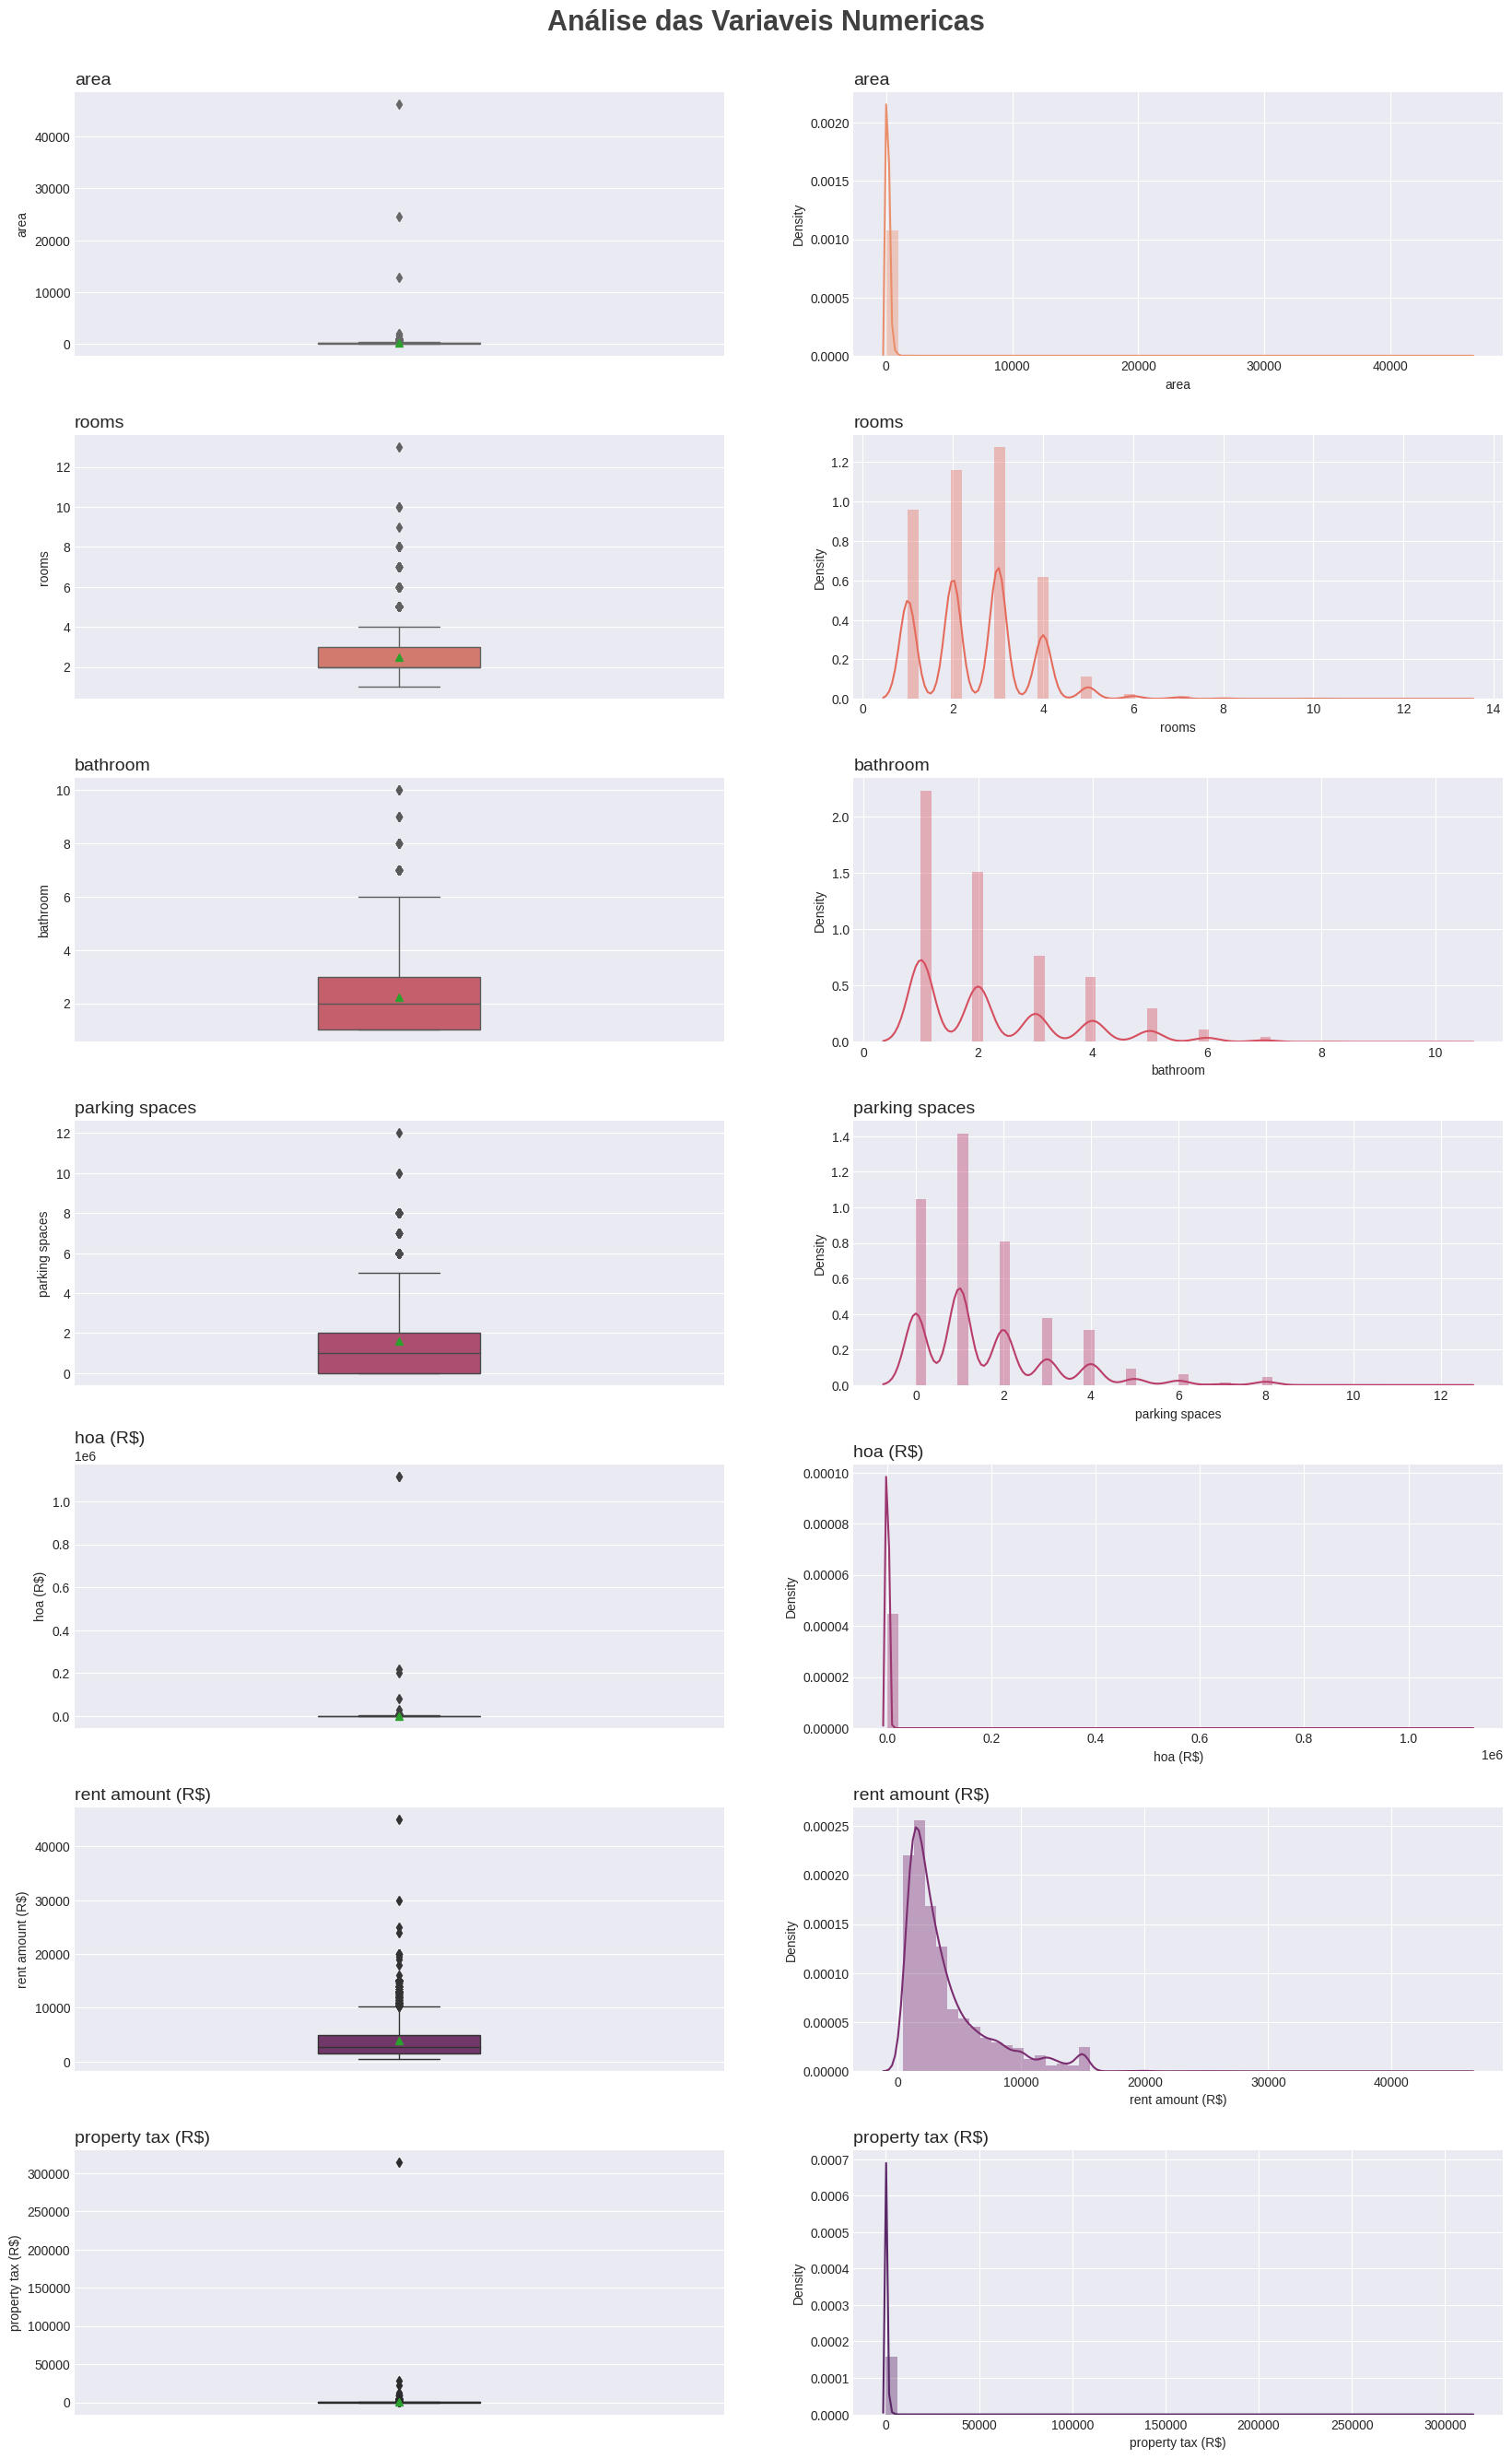

In [66]:
# Grid - Gráfico
# Tamanho
figura, eixo = plt.subplots( figsize = (20,30) )

#cor de fundo
cor_fundo = '#f5f5f5'

# paleta de cores
paleta_cores = sns.color_palette( 'flare', len(colunas_numericas) * 2)

# titulo
plt.suptitle( 'Análise das Variaveis Numericas', fontsize = 22, color = '#404040', fontweight=600)

# Estrutura
linhas = 7 # (todas as infos numericas)
colunas = 2 # boxplot - displot
posicao = 1 # posicao inicial do grid

for coluna in colunas_numericas:

    # Plot no grid
    plt.subplot(linhas, colunas, posicao)

    # Titulo
    plt.title( f'{coluna}', loc= 'left', fontsize=14, fontweight=200)

    # Plot
    sns.boxplot( data=base_dados, y=coluna, showmeans=True, saturation=0.75, linewidth=1, color=paleta_cores[posicao], width=0.25)

    # Mudar
    posicao += 1
    
    # Plot no grid --- Distplot
    plt.subplot(linhas, colunas, posicao)

    # Titulo
    plt.title( f'{coluna}', loc= 'left', fontsize=14, fontweight=200)

    # Plot
    sns.distplot(base_dados[coluna], color=paleta_cores[posicao - 1])

    # Mudar
    posicao += 1

# Ajuste de Grid
plt.subplots_adjust( top=0.95, hspace=0.3)

In [67]:
base_dados.loc[ base_dados['area'] <= 10000]['area'].describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [68]:
base_dados.loc[ base_dados['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [69]:
 base_dados['hoa (R$)'].sort_values( ascending=False).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [76]:
base_dados.iloc[ 7020 ]

city                     São Paulo
area                           224
rooms                            4
bathroom                         5
parking spaces                   3
floor                           12
animal                       acept
furniture            not furnished
hoa (R$)                      9500
rent amount (R$)              9500
property tax (R$)             1650
Name: 7020, dtype: object

In [79]:
base_dados.loc[ base_dados['rent amount (R$)'] <= 40000]['rent amount (R$)'].describe()

count    10691.000000
mean      3892.402488
std       3385.440586
min        450.000000
25%       1530.000000
50%       2660.000000
75%       5000.000000
max      30000.000000
Name: rent amount (R$), dtype: float64

In [80]:
base_dados['property tax (R$)'].sort_values( ascending=False).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: property tax (R$), dtype: int64

In [86]:
base_dados.iloc[ 6645 ]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object